# Business Problem


# Data Understanding and EDA

In [14]:
!pip install gensim
!pip install wordcloud
from wordcloud import WordCloud
from sklearn.svm import LinearSVC
import nltk
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.model_selection import train_test_split
from matplotlib import cm
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import LogisticRegression
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize
from sklearn.linear_model import SGDClassifier
from gensim.models import Word2Vec
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
import string, re
string.punctuation

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

You should consider upgrading via the '/Users/benspilsbury/opt/anaconda3/envs/learn-env/bin/python3.6 -m pip install --upgrade pip' command.
You should consider upgrading via the '/Users/benspilsbury/opt/anaconda3/envs/learn-env/bin/python3.6 -m pip install --upgrade pip' command.


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/benspilsbury/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/benspilsbury/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/benspilsbury/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# Data Cleaning

In [5]:
df = pd.read_csv('https://query.data.world/s/koumlilh5zav774mivuajaeahtefko',encoding= 'unicode_escape')
df = df[df.is_there_an_emotion_directed_at_a_brand_or_product != "I can't tell"]

In [6]:
apple=df[(df.emotion_in_tweet_is_directed_at=='iPad') | 
      (df.emotion_in_tweet_is_directed_at=='Apple') |
      (df.emotion_in_tweet_is_directed_at=='iPad or iPhone App') | 
      (df.emotion_in_tweet_is_directed_at=='iPhone') |
      (df.emotion_in_tweet_is_directed_at=='Other Apple product or service')]
google=df[(df.emotion_in_tweet_is_directed_at=='Google') | 
      (df.emotion_in_tweet_is_directed_at=='Other Google product or service') |
      (df.emotion_in_tweet_is_directed_at=='Android App') | 
      (df.emotion_in_tweet_is_directed_at=='Android')]

In [7]:
text_cleaning_re = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"

stop_words = stopwords.words('english')
stop_words += list(string.punctuation)
stop_words += ["''", '""', '...', '``', '’', '“', '’', '”', '‘', '‘', '©','2',2]
new_words=('sxsw','SXSW', 'mention','link','ipad','apple','quot','google','rt','quote','store','iphone')
for i in new_words:
    stop_words.append(i)

sw_set = set(stop_words)
stop_list = stop_words

In [8]:
def process_article(article):
    article = re.sub(text_cleaning_re, ' ', str(article).lower()).strip()
    tokens = nltk.word_tokenize(article)
    stopwords_removed = [token.lower() for token in tokens if token.lower() not in sw_set]
    return stopwords_removed

In [10]:
lemmatizer = WordNetLemmatizer() 

processed_data = list(map(process_article, df['tweet_text']))
lemmatized_output = []

for listy in processed_data:
    lemmed = ' '.join([lemmatizer.lemmatize(w) for w in listy])
    lemmatized_output.append(lemmed)

apple.tweet_text=apple['tweet_text'].map(lambda x: lemmatizer.lemmatize(x))
google.tweet_text=google['tweet_text'].map(lambda x: lemmatizer.lemmatize(x))

/Users/benspilsbury/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [11]:
target = df['is_there_an_emotion_directed_at_a_brand_or_product']

gdata = google['tweet_text']
gtarget = google['is_there_an_emotion_directed_at_a_brand_or_product']

adata = apple['tweet_text']
atarget = apple['is_there_an_emotion_directed_at_a_brand_or_product']

## Vectorize

In [32]:
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(lowercase=True,stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
cv_apple = CountVectorizer(lowercase=True,stop_words='english',ngram_range = (1,1), tokenizer = token.tokenize)
cv_google = CountVectorizer(lowercase=True,stop_words='english',ngram_range = (1,1), tokenizer = token.tokenize)
text_counts= cv.fit_transform(df['tweet_text'].values.astype('U'))
apple_text_counts= cv_apple.fit_transform(apple['tweet_text'])
google_text_counts= cv_google.fit_transform(google['tweet_text'])
total_df = pd.DataFrame(text_counts.todense(),columns = cv.get_feature_names())
apple_df = pd.DataFrame(apple_text_counts.todense(), columns = cv_apple.get_feature_names())
google_df = pd.DataFrame(google_text_counts.todense(),columns = cv_google.get_feature_names())

## EDA

In [19]:
df.shape

(8937, 3)

In [20]:
df.isna().sum()

tweet_text                                               1
emotion_in_tweet_is_directed_at                       5655
is_there_an_emotion_directed_at_a_brand_or_product       0
dtype: int64

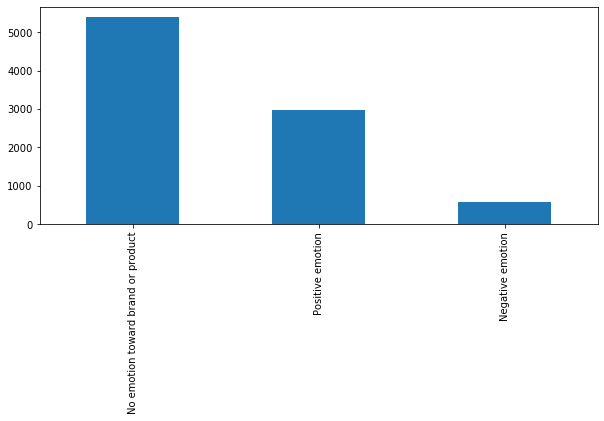

In [21]:
plt.figure(figsize=(10,4))
df['is_there_an_emotion_directed_at_a_brand_or_product'].value_counts().plot(kind='bar');

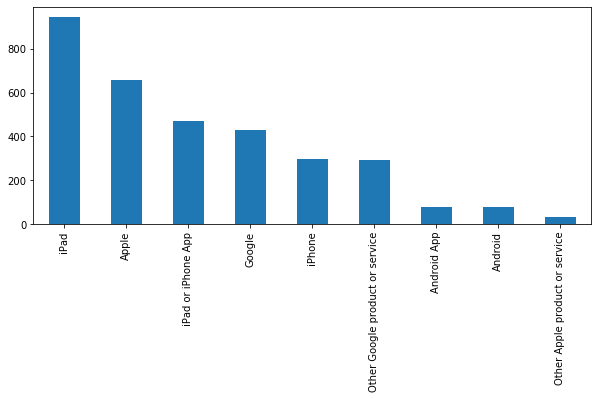

In [22]:
plt.figure(figsize=(10,4))
df['emotion_in_tweet_is_directed_at'].value_counts().plot(kind='bar');

In [29]:
tf=TfidfVectorizer(stop_words = stop_list,tokenizer = token.tokenize)
text_tf= tf.fit_transform(df['tweet_text'].values.astype('U'))
text_tf.data

array([0.35921222, 0.33882268, 0.29772553, ..., 0.67689124, 0.61121706,
       0.41016089])

In [64]:
fn_tdm_df(df['tweet_text'].values.astype('U')).T

,0,00,000,00am,00pm,01am,02,03,0310apple,06,...,zms,zomb,zombie,zombies,zomg,zone,zoom,zuckerberg,zynga,zzzs
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8932,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8933,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8934,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8935,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [66]:
# get a quick look of the non zero elements

non_zero_cols = tfidf_data_train_lem.nnz / float(tfidf_data_train_lem.shape[0])
print("Average Number of Non-Zero Elements in Vectorized Articles: {}".format(non_zero_cols))

percent_sparse = 1 - (non_zero_cols / float(tfidf_data_train_lem.shape[1]))
print('Percentage of columns containing ZERO: {}'.format(percent_sparse))

Average Number of Non-Zero Elements in Vectorized Articles: 21.497272345782626
Percentage of columns containing ZERO: 0.9996839565959161


In [40]:
# Create function to vectorize a dataframe and create features out of tokens with token counts as values

def fn_tdm_df(docs, xColNames = None, **kwargs):

    #initialize the  vectorizer
    vectorizer = CountVectorizer(**kwargs,stop_words = stop_list,tokenizer = token.tokenize)
    x1 = vectorizer.fit_transform(docs)
    
    #create dataFrame
    df = pd.DataFrame(x1.toarray().transpose(), index = vectorizer.get_feature_names())

    if xColNames is not None:
        df.columns = xColNames

    return df

## Find Word Token Frequencies

In [41]:
# Split full data into different emotional sets
df_freq_positive = df[df['is_there_an_emotion_directed_at_a_brand_or_product']=='Positive emotion']
df_freq_negative = df[df['is_there_an_emotion_directed_at_a_brand_or_product']=='Negative emotion']
df_freq_neut = df[df['is_there_an_emotion_directed_at_a_brand_or_product']=='No emotion toward brand or product']

# Extract actual tweet text, separate based on emotion
data_positive = df_freq_positive['tweet_text']
data_negative = df_freq_negative['tweet_text']
data_neutral = df_freq_neut['tweet_text']

# Perform word counts for each emotional set of tweets
pros_positive = list(map(process_article, data_positive))
pros_negative = list(map(process_article, data_negative))
pros_neutral = list(map(process_article, data_neutral))

# Create sets of unique words for each emotional set
total_vocab_positive = set()
for comment in pros_positive:
    total_vocab_positive.update(comment)
len(total_vocab_positive)

total_vocab_negative = set()
for comment in pros_negative:
    total_vocab_negative.update(comment)
len(total_vocab_negative)

total_vocab_neutral = set()
for comment in pros_neutral:
    total_vocab_neutral.update(comment)
len(total_vocab_neutral)

flat_positive = [item for sublist in pros_positive for item in sublist]
flat_negative = [item for sublist in pros_negative for item in sublist]
flat_neutral = [item for sublist in pros_neutral for item in sublist]

# Find word frequencies for each emotional set
positive_freq = FreqDist(flat_positive)
negative_freq = FreqDist(flat_negative)
neutral_freq = FreqDist(flat_neutral)

In [76]:
positive_total_word_count = sum(positive_freq.values())
positive_top_25 = positive_freq.most_common(25)
print("Word \t\t Normalized Frequency")
print()
for word in positive_top_25:
    normalized_frequency = word[1]/positive_total_word_count
    print("{} \t\t {:.4}".format(word[0], normalized_frequency))

Word 		 Normalized Frequency

app 		 0.01588
new 		 0.01429
austin 		 0.01179
pop 		 0.008496
amp 		 0.008377
ipad2 		 0.008377
android 		 0.008258
launch 		 0.006352
get 		 0.006273
one 		 0.005876
great 		 0.005439
party 		 0.00532
via 		 0.00524
line 		 0.00524
time 		 0.005082
free 		 0.005002
social 		 0.004923
circles 		 0.004843
cool 		 0.004764
like 		 0.004565
today 		 0.004526
day 		 0.004367
maps 		 0.004208
w 		 0.004129
mobile 		 0.004049


In [77]:
negative_total_word_count = sum(negative_freq.values())
negative_top_25 = negative_freq.most_common(25)
print("Word \t\t Normalized Frequency")
print()
for word in negative_top_25:
    normalized_frequency = word[1]/negative_total_word_count
    print("{} \t\t {:.4}".format(word[0], normalized_frequency))

Word 		 Normalized Frequency

app 		 0.01189
new 		 0.008518
like 		 0.007726
circles 		 0.006735
social 		 0.006141
apps 		 0.005943
design 		 0.005745
people 		 0.005745
austin 		 0.005547
need 		 0.004952
android 		 0.004754
get 		 0.004754
one 		 0.004556
amp 		 0.004358
launch 		 0.004358
today 		 0.00416
would 		 0.003764
line 		 0.003566
news 		 0.003566
time 		 0.003566
think 		 0.003566
fail 		 0.003566
headaches 		 0.003368
1 		 0.003368
go 		 0.003368


In [45]:
neutral_total_word_count = sum(neutral_freq.values())
neutral_top_25 = neutral_freq.most_common(25)
print("Word \t\t Normalized Frequency")
print()
for word in neutral_top_25:
    normalized_frequency = word[1]/neutral_total_word_count
    print("{} \t\t {:.4}".format(word[0], normalized_frequency))

Word 		 Normalized Frequency

new 		 0.01504
austin 		 0.01404
amp 		 0.01331
social 		 0.01114
circles 		 0.01112
launch 		 0.0103
today 		 0.009769
app 		 0.007953
android 		 0.007953
network 		 0.007886
pop 		 0.007864
via 		 0.006247
called 		 0.006136
free 		 0.005804
line 		 0.005605
mobile 		 0.005294
ipad2 		 0.005228
sxswi 		 0.005117
major 		 0.005095
get 		 0.004674
party 		 0.004652
possibly 		 0.004231
check 		 0.003832
temporary 		 0.003766
opening 		 0.003655


In [48]:
# create counts of Positive, Negative, and Neutral with values and words
positive_bar_counts = [x[1] for x in positive_freq.most_common(25)]
positive_bar_words = [x[0] for x in positive_freq.most_common(25)]

negative_bar_counts = [x[1] for x in negative_freq.most_common(25)]
negative_bar_words = [x[0] for x in negative_freq.most_common(25)]

neutral_bar_counts = [x[1] for x in neutral_freq.most_common(25)]
neutral_bar_words = [x[0] for x in neutral_freq.most_common(25)]

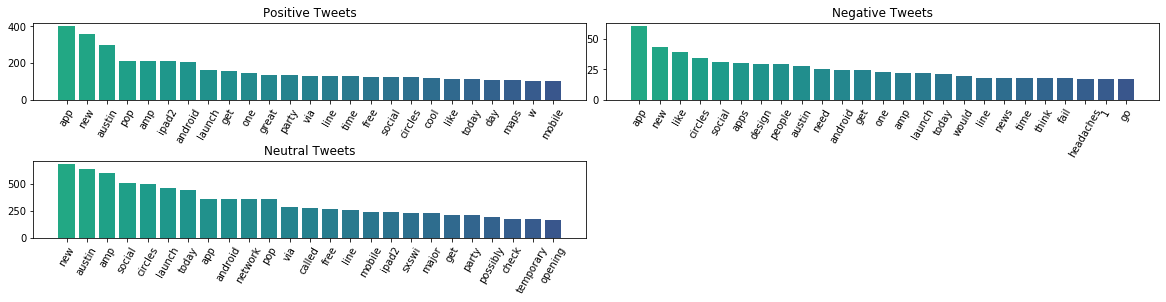

In [57]:
# set the color of our bar graphs
color = cm.viridis_r(np.linspace(.4,.8, 30))

new_figure = plt.figure(figsize=(16,4))

ax = new_figure.add_subplot(221)
ax2 = new_figure.add_subplot(222)
ax3 = new_figure.add_subplot(223)

# Generate a line plot on first axes
ax.bar(positive_bar_words, positive_bar_counts, color=color)
# ax.plot(colormap='PRGn')

# Draw a scatter plot on 2nd axes
ax2.bar(negative_bar_words, negative_bar_counts, color=color )

ax3.bar(neutral_bar_words, neutral_bar_counts, color=color )

ax.title.set_text('Positive Tweets')
ax2.title.set_text('Negative Tweets')
ax3.title.set_text('Neutral Tweets')

for ax in new_figure.axes:
    plt.sca(ax)
    plt.xticks(rotation=60)

plt.tight_layout(pad=0)

# plt.savefig('word count bar graphs.png')

plt.show()

In [63]:
# Getting our data into a dictionary
#FORMAT:  dictionary = dict(zip(keys, values))
positive_dictionary = dict(zip(positive_bar_words, positive_bar_counts))
negative_dictionary = dict(zip(negative_bar_words, negative_bar_counts))

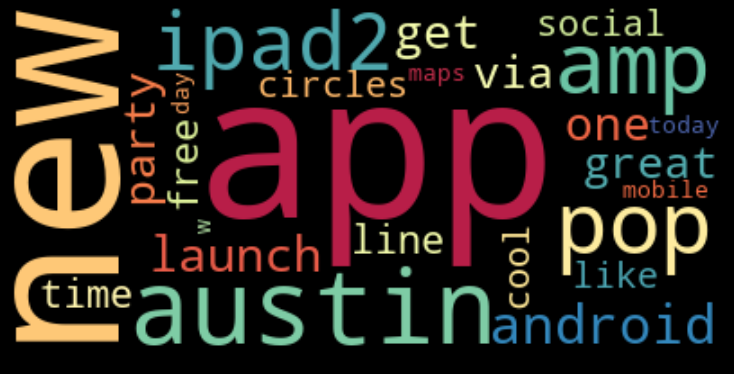

In [82]:
# Create the word cloud:
wordcloud = WordCloud(colormap='Spectral').generate_from_frequencies(positive_dictionary)

# Display the generated image w/ matplotlib:
plt.figure(figsize=(10,10), facecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

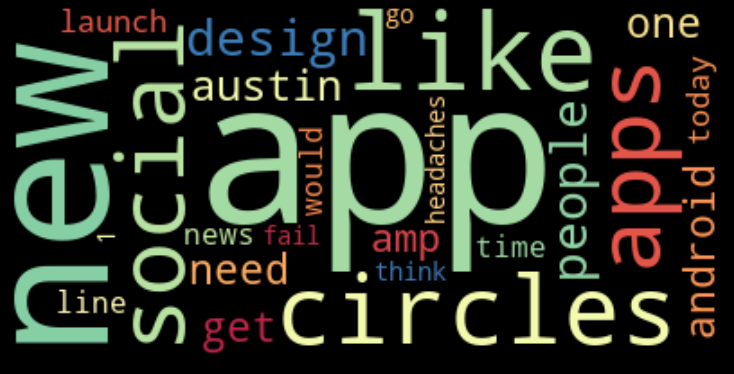

In [83]:
wordcloud = WordCloud(colormap='Spectral').generate_from_frequencies(negative_dictionary)

plt.figure(figsize=(10,10), facecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)

plt.show()


## Apple Frequencies

In [59]:
afreqpos=apple[apple['is_there_an_emotion_directed_at_a_brand_or_product']=='Positive emotion']
afreqneg=apple[apple['is_there_an_emotion_directed_at_a_brand_or_product']=='Negative emotion']
afreqneut=apple[apple['is_there_an_emotion_directed_at_a_brand_or_product']=='No emotion toward brand or product']

adatapos=afreqpos.tweet_text
adataneg=afreqneg.tweet_text
adataneut=afreqneut.tweet_text

apos = list(map(process_article, adatapos))
aneg = list(map(process_article, adataneg))
aneut = list(map(process_article, adataneut))

atotal_vocab_pos = set()
for comment in apos:
    atotal_vocab_pos.update(comment)

atotal_vocab_neg = set()
for comment in aneg:
    atotal_vocab_neg.update(comment)

atotal_vocab_neut = set()
for comment in aneut:
    atotal_vocab_neut.update(comment)
    
flat_apos = [item for sublist in apos for item in sublist]
flat_aneg = [item for sublist in aneg for item in sublist]
flat_aneut = [item for sublist in aneut for item in sublist]

apos_freq = FreqDist(flat_apos)
aneg_freq = FreqDist(flat_aneg)
aneut_freq = FreqDist(flat_aneut)

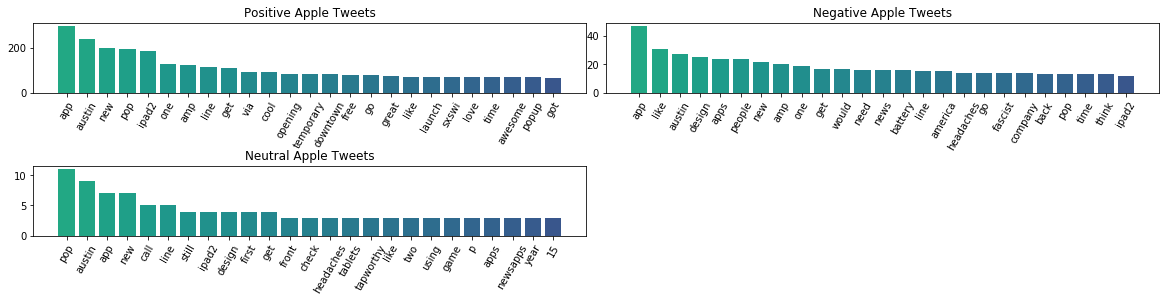

In [60]:
# create counts of Positive, Negative, and Neutral with values and words
positive_bar_counts = [x[1] for x in apos_freq.most_common(25)]
positive_bar_words = [x[0] for x in apos_freq.most_common(25)]

negative_bar_counts = [x[1] for x in aneg_freq.most_common(25)]
negative_bar_words = [x[0] for x in aneg_freq.most_common(25)]

neutral_bar_counts = [x[1] for x in aneut_freq.most_common(25)]
neutral_bar_words = [x[0] for x in aneut_freq.most_common(25)]

# set the color of our bar graphs
color = cm.viridis_r(np.linspace(.4,.8, 30))

new_figure = plt.figure(figsize=(16,4))

ax = new_figure.add_subplot(221)
ax2 = new_figure.add_subplot(222)
ax3 = new_figure.add_subplot(223)

# Generate a line plot on first axes
ax.bar(positive_bar_words, positive_bar_counts, color=color)
# ax.plot(colormap='PRGn')

# Draw a scatter plot on 2nd axes
ax2.bar(negative_bar_words, negative_bar_counts, color=color )

ax3.bar(neutral_bar_words, neutral_bar_counts, color=color )

ax.title.set_text('Positive Apple Tweets')
ax2.title.set_text('Negative Apple Tweets')
ax3.title.set_text('Neutral Apple Tweets')

for ax in new_figure.axes:
    plt.sca(ax)
    plt.xticks(rotation=60)

plt.tight_layout(pad=0)

# plt.savefig('apple word count bar graphs.png')

plt.show()

## Google Word Frequencies

In [61]:
gfreqpos=google[google['is_there_an_emotion_directed_at_a_brand_or_product']=='Positive emotion']
gfreqneg=google[google['is_there_an_emotion_directed_at_a_brand_or_product']=='Negative emotion']
gfreqneut=google[google['is_there_an_emotion_directed_at_a_brand_or_product']=='No emotion toward brand or product']

gdatapos=gfreqpos.tweet_text
gdataneg=gfreqneg.tweet_text
gdataneut=gfreqneut.tweet_text

gpos = list(map(process_article, gdatapos))
gneg = list(map(process_article, gdataneg))
gneut = list(map(process_article, gdataneut))

gtotal_vocab_pos = set()
for comment in gpos:
    gtotal_vocab_pos.update(comment)

gtotal_vocab_neg = set()
for comment in gneg:
    gtotal_vocab_neg.update(comment)

gtotal_vocab_neut = set()
for comment in gneut:
    gtotal_vocab_neut.update(comment)
    
flat_gpos = [item for sublist in gpos for item in sublist]
flat_gneg = [item for sublist in gneg for item in sublist]
flat_gneut = [item for sublist in gneut for item in sublist]

gpos_freq = FreqDist(flat_gpos)
gneg_freq = FreqDist(flat_gneg)
gneut_freq = FreqDist(flat_gneut)

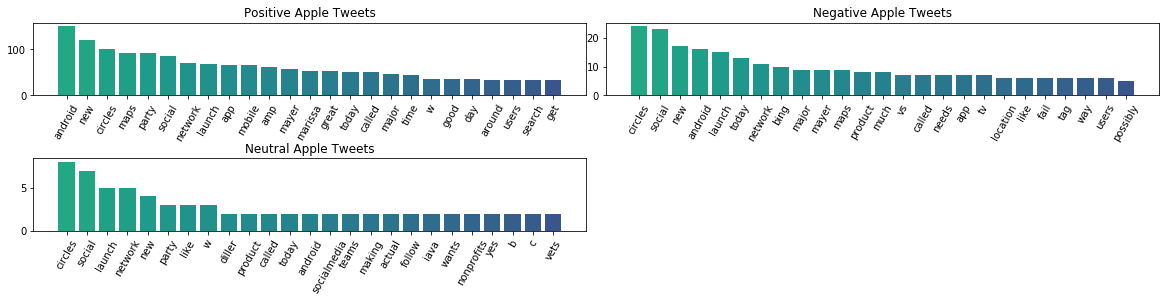

In [62]:
# create counts of Positive, Negative, and Neutral with values and words
positive_bar_counts = [x[1] for x in gpos_freq.most_common(25)]
positive_bar_words = [x[0] for x in gpos_freq.most_common(25)]

negative_bar_counts = [x[1] for x in gneg_freq.most_common(25)]
negative_bar_words = [x[0] for x in gneg_freq.most_common(25)]

neutral_bar_counts = [x[1] for x in gneut_freq.most_common(25)]
neutral_bar_words = [x[0] for x in gneut_freq.most_common(25)]

# set the color of our bar graphs
color = cm.viridis_r(np.linspace(.4,.8, 30))

new_figure = plt.figure(figsize=(16,4))

ax = new_figure.add_subplot(221)
ax2 = new_figure.add_subplot(222)
ax3 = new_figure.add_subplot(223)

# Generate a line plot on first axes
ax.bar(positive_bar_words, positive_bar_counts, color=color)

# Draw a scatter plot on 2nd axes
ax2.bar(negative_bar_words, negative_bar_counts, color=color )

ax3.bar(neutral_bar_words, neutral_bar_counts, color=color )

ax.title.set_text('Positive Apple Tweets')
ax2.title.set_text('Negative Apple Tweets')
ax3.title.set_text('Neutral Apple Tweets')

for ax in new_figure.axes:
    plt.sca(ax)
    plt.xticks(rotation=60)

plt.tight_layout(pad=0)

# plt.savefig('apple word count bar graphs.png')

plt.show()

# Analysis and Model Development

## Full Data Train Test Split

In [15]:
X_lem = lemmatized_output
y_lem = target

X_train_lem, X_test_lem, y_train_lem, y_test_lem = train_test_split(X_lem, y_lem, test_size=0.40, random_state=1)

accuracy 0.6657342657342658
                                    precision    recall  f1-score   support

                  Negative emotion       0.51      0.27      0.35       228
                  Positive Emotion       0.71      0.80      0.75      2164
No emotion toward brand or product       0.58      0.49      0.53      1183

                          accuracy                           0.67      3575
                         macro avg       0.60      0.52      0.55      3575
                      weighted avg       0.65      0.67      0.65      3575



## Full Data Pipeline Model

In [16]:
sentiments = ['Negative emotion','Positive Emotion','No emotion toward brand or product']
model = LinearSVC()

nb_pipeline = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', model)])
nb_pipeline.fit(X_train_lem, y_train_lem)


from sklearn.metrics import classification_report
y_pred = nb_pipeline.predict(X_test_lem)

print('accuracy %s' % accuracy_score(y_pred, y_test_lem))
print(classification_report(y_test_lem, y_pred,target_names=sentiments))

accuracy 0.6657342657342658
                                    precision    recall  f1-score   support

                  Negative emotion       0.51      0.27      0.35       228
                  Positive Emotion       0.71      0.80      0.75      2164
No emotion toward brand or product       0.58      0.49      0.53      1183

                          accuracy                           0.67      3575
                         macro avg       0.60      0.52      0.55      3575
                      weighted avg       0.65      0.67      0.65      3575



## Apple Train Test

In [19]:
# Establish features and target in data

aX=adata.values.astype('U')
ay=atarget.values.astype('U')

# Split features and target into training and testing partitions

aX_train, aX_test, ay_train, ay_test = train_test_split(aX, ay, random_state=1)

## Google Train Test

In [20]:
# Establish features and target in data

gX=gdata.values.astype('U')
gy=gtarget.values.astype('U')

# Split features and target into training and testing partitions

gX_train, gX_test, gy_train, gy_test = train_test_split(gX, gy, random_state=1)

#### Most Frequent Words by Category?

#### Word Count by Category? Do people that like brand talk longer about it?

## Apple Pipeline Model

In [163]:
from sklearn.svm import LinearSVC
from sklearn.dummy import DummyClassifier
model = LinearSVC()
dummy_clf = DummyClassifier(strategy="most_frequent")
#model= MultinomialNB()

nb_pipeline = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', model)])

nb_pipeline.fit(aX_train, ay_train)

ay_pred = nb_pipeline.predict(aX_test)

print('accuracy %s' % accuracy_score(ay_pred, ay_test))
print(classification_report(ay_test, ay_pred,target_names=sentiments))

accuracy 0.8569051580698835
                                    precision    recall  f1-score   support

                  Negative emotion       0.69      0.44      0.54        97
                  Positive Emotion       0.00      0.00      0.00        15
No emotion toward brand or product       0.88      0.97      0.92       489

                          accuracy                           0.86       601
                         macro avg       0.52      0.47      0.49       601
                      weighted avg       0.83      0.86      0.84       601



## Google Pipeline Model

In [21]:
model = LinearSVC()

nb_pipeline = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('svc', model)])

nb_pipeline.fit(gX_train, gy_train)

gy_pred = nb_pipeline.predict(gX_test)


sentiments = ['Negative emotion','Positive Emotion','No emotion toward brand or product']
print('accuracy %s' % accuracy_score(gy_pred, gy_test))
print(classification_report(gy_test, gy_pred,target_names=sentiments))

accuracy 0.85
                                    precision    recall  f1-score   support

                  Negative emotion       0.76      0.34      0.47        38
                  Positive Emotion       0.50      0.20      0.29         5
No emotion toward brand or product       0.86      0.98      0.92       177

                          accuracy                           0.85       220
                         macro avg       0.71      0.51      0.56       220
                      weighted avg       0.84      0.85      0.82       220



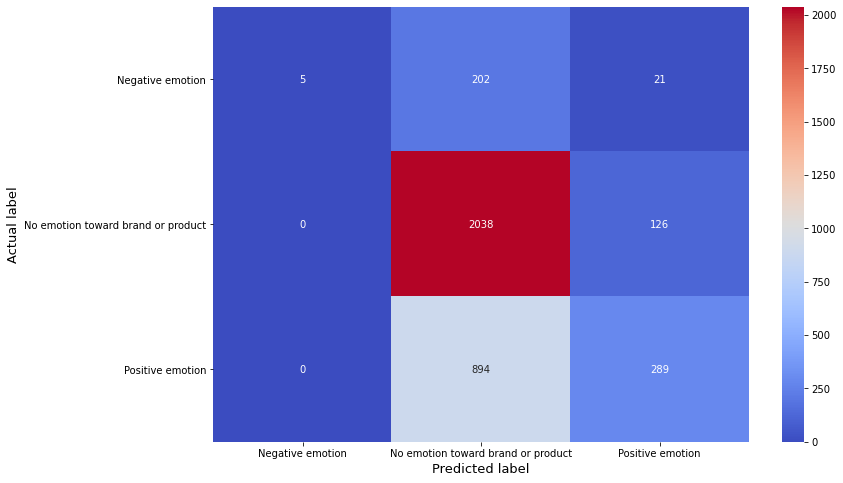

In [101]:
#Generate confusion matrix
labels = np.unique(y_test_lem)
cm = confusion_matrix(y_test_lem, y_pred,labels=labels) 

cm_df = pd.DataFrame(cm,index=labels, columns=labels)

#Plot
plt.figure(figsize=(12, 8))

sns.heatmap(cm_df,
            cmap='coolwarm', 
            annot=True, 
            fmt='g')

plt.ylabel('Actual label', fontsize = 13)
plt.xlabel('Predicted label', fontsize = 13)
plt.show()

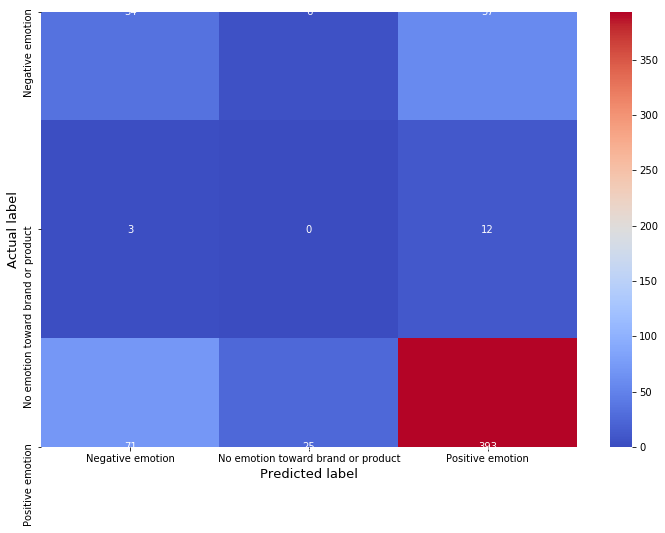

In [129]:
#Generate confusion matrix
alabels = np.unique(ay_test)
acm = confusion_matrix(ay_test, ay_pred, labels=alabels) 

acm_df = pd.DataFrame(acm,index=alabels, columns=alabels)

#Plot
plt.figure(figsize=(12, 8))

sns.heatmap(acm_df,
            cmap='coolwarm', 
            annot=True, 
            fmt='g')

plt.ylabel('Actual label', fontsize = 13)
plt.xlabel('Predicted label', fontsize = 13)
plt.show()

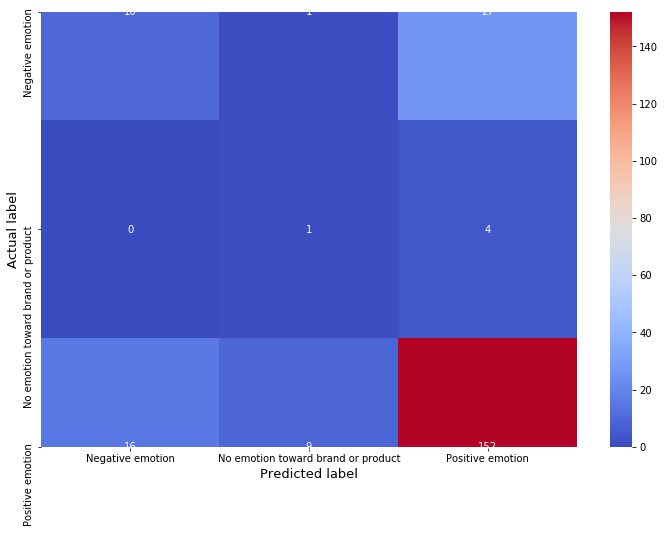

In [130]:
#Generate confusion matrix
glabels = np.unique(gy_test)
gcm = confusion_matrix(gy_test, gy_pred, labels=glabels) 

gcm_df = pd.DataFrame(gcm,index=glabels, columns=glabels)

#Plot
plt.figure(figsize=(12, 8))

sns.heatmap(gcm_df,
            cmap='coolwarm', 
            annot=True, 
            fmt='g')

plt.ylabel('Actual label', fontsize = 13)
plt.xlabel('Predicted label', fontsize = 13)
plt.show()

# Specific Tweet of False Positive Showing Sarcasm

In [102]:
y_hats2 = nb_pipeline.predict(lemmatized_output)

df['y_hats'] = y_hats2

In [104]:
df.loc[(df['is_there_an_emotion_directed_at_a_brand_or_product'] == "Positive emotion") & (df['y_hats'] == 'No emotion toward brand or product')]

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product,y_hats
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion,No emotion toward brand or product
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion,No emotion toward brand or product
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion,No emotion toward brand or product
10,Excited to meet the @samsungmobileus at #sxsw ...,Android,Positive emotion,No emotion toward brand or product
11,Find &amp; Start Impromptu Parties at #SXSW Wi...,Android App,Positive emotion,No emotion toward brand or product
...,...,...,...,...
9064,@mention you should see the line here at #SXSW...,Apple,Positive emotion,No emotion toward brand or product
9070,You know you've made it to #sxsw when you see ...,iPad,Positive emotion,No emotion toward brand or product
9071,what are your essentials for #SxSW? Mine? poc...,iPad,Positive emotion,No emotion toward brand or product
9077,@mention your PR guy just convinced me to swit...,iPhone,Positive emotion,No emotion toward brand or product


# Summary and Conclusion

- Final Model
- Shortcomings in data and strategy to deal w/ data
- Next Steps